In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
SAVE_DIR = "/content/drive/MyDrive/mini-project-ai-art/outputs"
os.makedirs(SAVE_DIR, exist_ok=True)
print("Folder created at:", SAVE_DIR)


Folder created at: /content/drive/MyDrive/mini-project-ai-art/outputs


In [3]:
out_path = f"{SAVE_DIR}/output1.png"
image.save(out_path)
print("Saved at:", out_path)


NameError: name 'image' is not defined

In [5]:
prompt = "a cinematic portrait of a medieval knight in golden armor, dramatic lighting, ultra detailed, artstation"
negative_prompt = "low quality, blurry, deformed, watermark, text, logo"

generator = torch.Generator(device="cuda").manual_seed(1234)
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    height=512, width=512,
    generator=generator
).images[0]

# Now 'image' exists


NameError: name 'torch' is not defined

In [6]:
!pip -q install torch torchvision torchaudio
!pip -q install --upgrade diffusers==0.30.2 transformers accelerate safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 140.7 MB/s eta 0:00:00


In [7]:
import torch
from diffusers import StableDiffusionPipeline

In [8]:
from huggingface_hub import login
login()   # paste your Hugging Face access token here

In [9]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
).to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/25 [00:00<?, ?it/s]

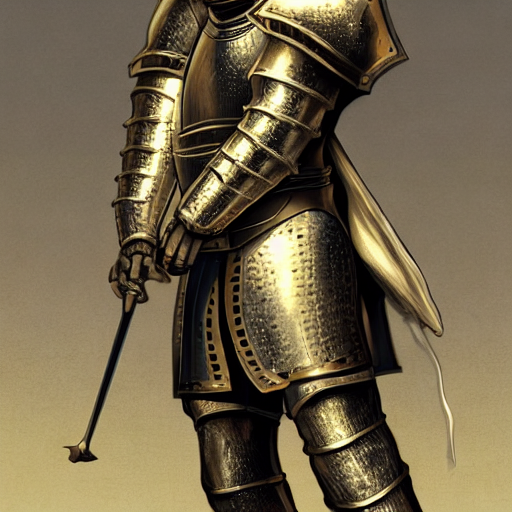

In [10]:
prompt = "a cinematic portrait of a medieval knight in golden armor, dramatic lighting, ultra detailed, artstation"
generator = torch.Generator("cuda").manual_seed(1234)

image = pipe(prompt, num_inference_steps=25, guidance_scale=7.5, generator=generator).images[0]
image


In [15]:
!pip -q install gradio

import gradio as gr

def infer(prompt, steps, cfg):
    return pipe(prompt, num_inference_steps=int(steps), guidance_scale=float(cfg)).images[0]

demo = gr.Interface(
    fn=infer,
    inputs=[
        gr.Textbox(label="Enter Prompt", placeholder="Type your idea here..."),
        gr.Slider(10, 40, value=25, step=1, label="Steps"),
        gr.Slider(3.0, 12.0, value=7.5, step=0.5, label="CFG Scale")
    ],
    outputs=gr.Image(type="pil"),
    title="AI Art Generation"
)

demo.launch(share=False)  # share=True if you want to generate a temp public link


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Enter your text prompt: Cyber punk city


  0%|          | 0/25 [00:00<?, ?it/s]

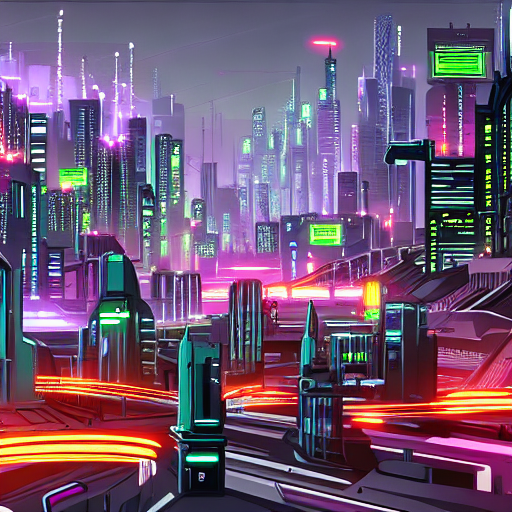

In [11]:
# Ask user for a prompt
prompt = input("Enter your text prompt: ")

negative_prompt = "low quality, blurry, watermark, text"
generator = torch.Generator("cuda").manual_seed(42)

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=25,
    guidance_scale=7.5,
    generator=generator
).images[0]

image


In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
SAVE_DIR = "/content/drive/MyDrive/mini-project-ai-art/outputs"
os.makedirs(SAVE_DIR, exist_ok=True)
print("Saving images to:", SAVE_DIR)


Saving images to: /content/drive/MyDrive/mini-project-ai-art/outputs


In [14]:
out_path = f"{SAVE_DIR}/output1.png"
image.save(out_path)
print("Saved at:", out_path)


Saved at: /content/drive/MyDrive/mini-project-ai-art/outputs/output1.png
